# Section-6

## Template Matching

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
full = cv2.imread('course_content/DATA/sammy.jpg')
full = cv2.cvtColor(full,cv2.COLOR_BGR2RGB)

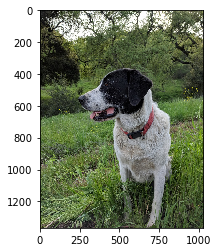

In [3]:
plt.imshow(full)

In [4]:
face = cv2.imread('course_content/DATA/sammy_face.jpg')
face = cv2.cvtColor(face,cv2.COLOR_BGR2RGB)

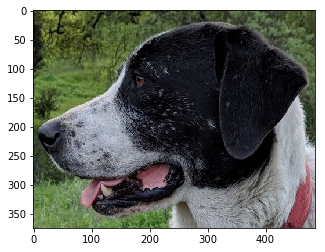

In [5]:
plt.imshow(face)

In [6]:
face.shape

(375, 486, 3)

In [7]:
# All the 6 methods for comparison in a list
# Note how we are using strings, later on we'll use the eval() function to convert to function
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

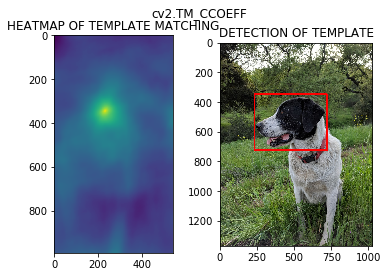

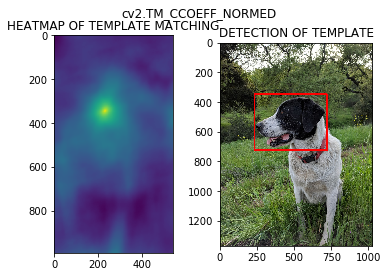

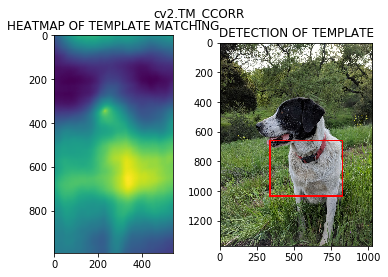

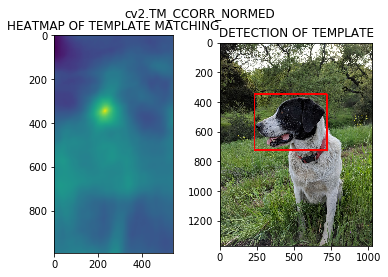

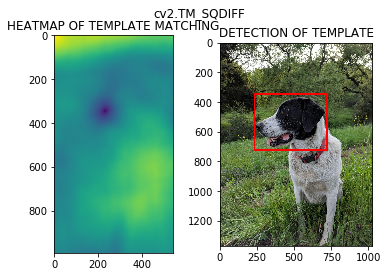

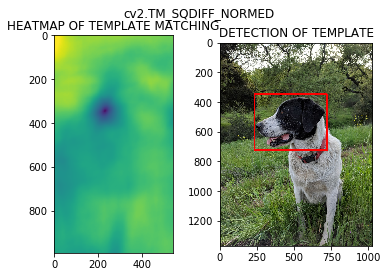

In [16]:
for m in methods:
    
    #CREATE A COPY OF IMAGE
    full_copy = full.copy()
    method = eval(m)
    
    #TEMPLATE MACHING
    res = cv2.matchTemplate(full_copy,face,method)
    
    min_val,max_val,min_loc,max_loc = cv2.minMaxLoc(res)
    if(method in [cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMED]):
        top_left = min_loc
    else:
        top_left = max_loc
        
    height,width,channels = face.shape
    bottom_right = (top_left[0]+width, top_left[1]+height)
    
    cv2.rectangle(full_copy,top_left,bottom_right,(255,0,0),10)
    
    #plot and show the images
    plt.subplot(121)
    plt.imshow(res)
    plt.title('HEATMAP OF TEMPLATE MATCHING')
    
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('DETECTION OF TEMPLATE')
    plt.suptitle(m)
    
    plt.show()
    print('\n')
    print('\n')

# Corner Detection - Part One - Harris Corner Detection

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
flat_chess = cv2.imread('course_content/DATA/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2RGB)

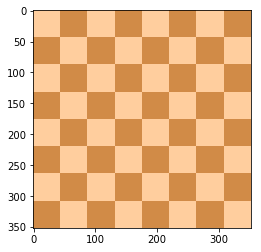

In [3]:
plt.imshow(flat_chess)

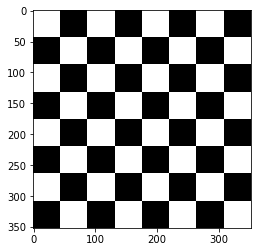

In [4]:
gray_flat_chess =  cv2.cvtColor(flat_chess,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_flat_chess,cmap='gray')

In [5]:
real_chess = cv2.imread('course_content/DATA/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2RGB)

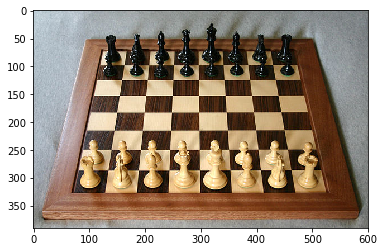

In [6]:
plt.imshow(real_chess)

In [7]:
gray_real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2GRAY)

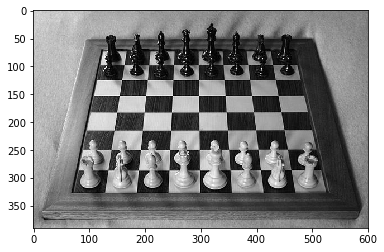

In [8]:
plt.imshow(gray_real_chess,cmap='gray')

In [9]:
gray = np.float32(gray_flat_chess)

In [10]:
dst = cv2.cornerHarris(src=gray,blockSize=2,ksize=3,k=0.04)

In [11]:
dst = cv2.dilate(dst,None)

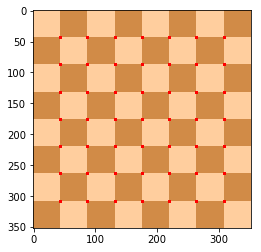

In [12]:
flat_chess[dst>0.01*dst.max()]= [255,0,0] 
plt.imshow(flat_chess)

In [13]:
gray = np.float32(gray_real_chess)
dst = cv2.cornerHarris(src=gray,blockSize=2,ksize=3,k=0.04)

In [14]:
dst = cv2.dilate(dst,None)

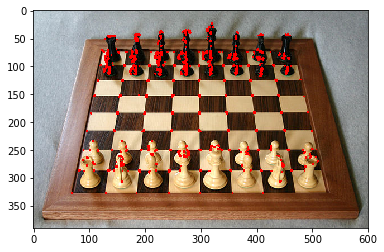

In [15]:
real_chess[dst>0.01*dst.max()]= [255,0,0] 
plt.imshow(real_chess)

# Corner Detection - Part Two - Shi-Tomasi Detection

In [16]:
real_chess = cv2.imread('course_content/DATA/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2RGB)

flat_chess = cv2.imread('course_content/DATA/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2RGB)

gray_flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2GRAY)
gray_real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2GRAY)

In [25]:
corners = cv2.goodFeaturesToTrack(gray_flat_chess,64,0.1,10)

In [26]:
corners = np.int0(corners)

In [27]:
for i in corners:
    x,y = i.ravel()
    cv2.circle(flat_chess,(x,y),3,(255,0,0),-1)

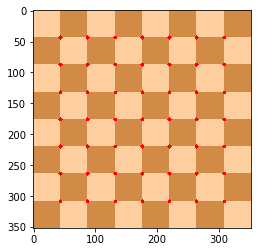

In [28]:
plt.imshow(flat_chess)

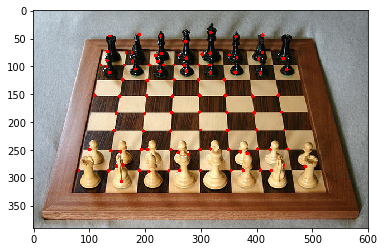

In [31]:
corners = cv2.goodFeaturesToTrack(gray_real_chess,100,0.1,10)
corners = np.int0(corners)
for i in corners:
    x,y = i.ravel()
    cv2.circle(real_chess,(x,y),3,(255,0,0),-1)

plt.imshow(real_chess)

# Edge Detection

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [33]:
img = cv2.imread('course_content/DATA/sammy_face.jpg')

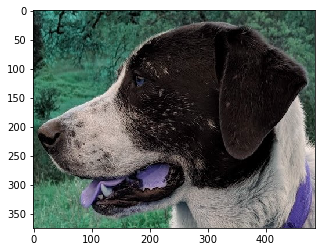

In [34]:
plt.imshow(img)

In [35]:
edges = cv2.Canny(image=img,threshold1=127,threshold2=127)

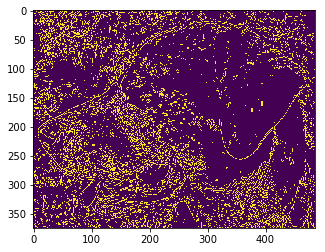

In [36]:
plt.imshow(edges)

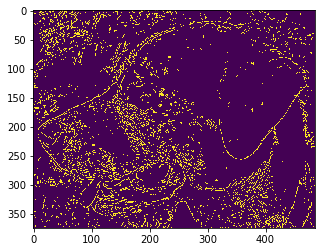

In [40]:
edges = cv2.Canny(image=img,threshold1=180,threshold2=180)
plt.imshow(edges)

In [42]:
med_val = np.median(img)
med_val

64.0

In [43]:
# Lower Threshold to either 0 or 70% of the median value whichever is greater
lower = int(max(0,0.7*med_val))
# Upper Threshold to either 130% of the median or the max 255, whichever is smaller
upper = int(min(255,1.3*med_val))

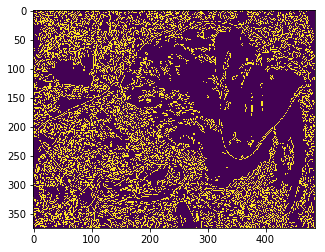

In [52]:
edges = cv2.Canny(image=img,threshold1=lower,threshold2=upper+100)
plt.imshow(edges)

In [53]:
blurred_img = cv2.blur(img,ksize=(7,7))

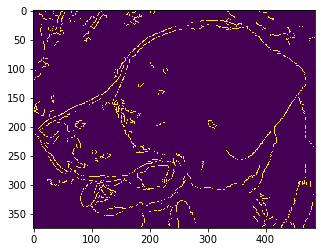

In [54]:
edges = cv2.Canny(image=blurred_img,threshold1=lower,threshold2=upper+20)
plt.imshow(edges)

# Grid Detection

In [55]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

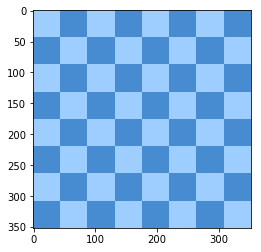

In [56]:
flat_chess = cv2.imread('course_content/DATA/flat_chessboard.png')
plt.imshow(flat_chess)

In [77]:
found,corners = cv2.findChessboardCorners(flat_chess,(7,7))

In [78]:
found

True

In [79]:
# corners

In [80]:
cv2.drawChessboardCorners(flat_chess,(7,7),corners,found)

array([[[158, 206, 255],
        [158, 206, 255],
        [158, 206, 255],
        ...,
        [ 71, 139, 209],
        [ 71, 139, 209],
        [ 71, 139, 209]],

       [[158, 206, 255],
        [158, 206, 255],
        [158, 206, 255],
        ...,
        [ 71, 139, 209],
        [ 71, 139, 209],
        [ 71, 139, 209]],

       [[158, 206, 255],
        [158, 206, 255],
        [158, 206, 255],
        ...,
        [ 71, 139, 209],
        [ 71, 139, 209],
        [ 71, 139, 209]],

       ...,

       [[ 71, 139, 209],
        [ 71, 139, 209],
        [ 71, 139, 209],
        ...,
        [158, 206, 255],
        [158, 206, 255],
        [158, 206, 255]],

       [[ 71, 139, 209],
        [ 71, 139, 209],
        [ 71, 139, 209],
        ...,
        [158, 206, 255],
        [158, 206, 255],
        [158, 206, 255]],

       [[ 71, 139, 209],
        [ 71, 139, 209],
        [ 71, 139, 209],
        ...,
        [158, 206, 255],
        [158, 206, 255],
        [158, 206, 255]]

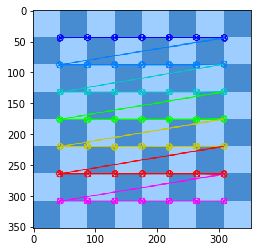

In [81]:
plt.imshow(flat_chess)

In [82]:
dots = cv2.imread('course_content/DATA/dot_grid.png')

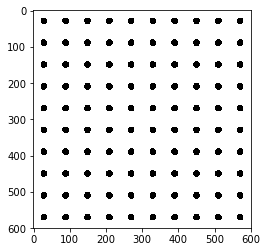

In [83]:
plt.imshow(dots)

In [84]:
found,corners = cv2.findCirclesGrid(dots,(10,10),cv2.CALIB_CB_SYMMETRIC_GRID)

In [85]:
found

True

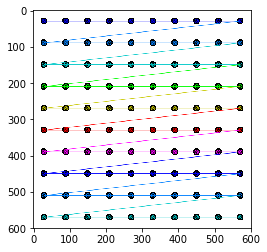

In [87]:
cv2.drawChessboardCorners(dots,(10,10),corners,found)
plt.imshow(dots)

# Contour Detection

In [91]:
img = cv2.imread('course_content/DATA/internal_external.png',0)
img.shape

(652, 1080)

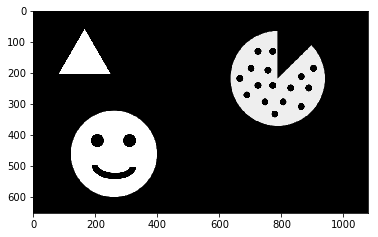

In [92]:
plt.imshow(img,cmap='gray')

In [93]:
image,contours,hierarchy = cv2.findContours(img,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

In [94]:
type(contours)

list

In [95]:
len(contours)

22

In [96]:
type(hierarchy)

numpy.ndarray

In [97]:
hierarchy

array([[[ 4, -1,  1, -1],
        [ 2, -1, -1,  0],
        [ 3,  1, -1,  0],
        [-1,  2, -1,  0],
        [21,  0,  5, -1],
        [ 6, -1, -1,  4],
        [ 7,  5, -1,  4],
        [ 8,  6, -1,  4],
        [ 9,  7, -1,  4],
        [10,  8, -1,  4],
        [11,  9, -1,  4],
        [12, 10, -1,  4],
        [13, 11, -1,  4],
        [14, 12, -1,  4],
        [15, 13, -1,  4],
        [16, 14, -1,  4],
        [17, 15, -1,  4],
        [18, 16, -1,  4],
        [19, 17, -1,  4],
        [20, 18, -1,  4],
        [-1, 19, -1,  4],
        [-1,  4, -1, -1]]], dtype=int32)

In [104]:
external_contours = np.zeros(image.shape)
external_contours.shape

(652, 1080)

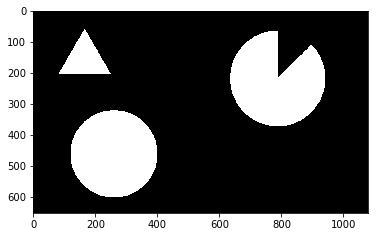

In [105]:
for i in range(len(contours)):
    #External contour
    if(hierarchy[0][i][3]== -1 ):
        cv2.drawContours(external_contours,contours,i,255,-1)

plt.imshow(external_contours,cmap='gray')

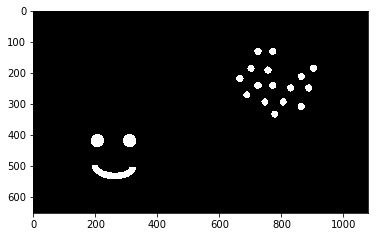

In [110]:
internal_contours = np.zeros(image.shape)
for i in range(len(contours)):
    #External contour
    if(hierarchy[0][i][3]!= -1 ):
        cv2.drawContours(internal_contours,contours,i,255,-1)

plt.imshow(internal_contours,cmap='gray')

# Feature Matching - Part One

In [111]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [112]:
reeses = cv2.imread('course_content/DATA/reeses_puffs.png',0)

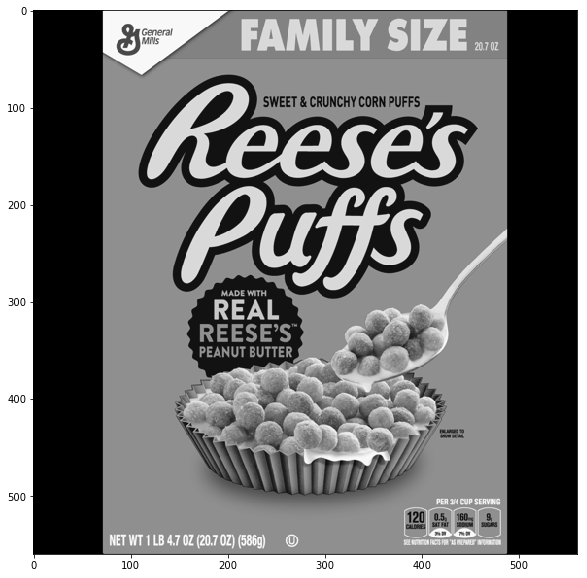

In [113]:
display(reeses)

In [114]:
cereals = cv2.imread('course_content/DATA/many_cereals.jpg',0)

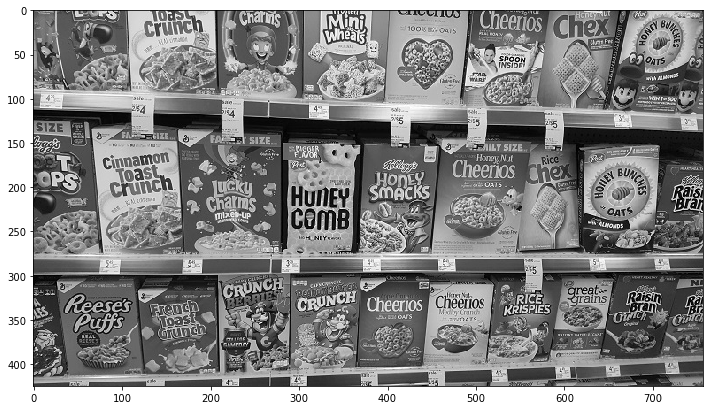

In [115]:
display(cereals)

In [116]:
orb = cv2.ORB_create()

In [119]:
kp1,des1 = orb.detectAndCompute(reeses,None)
kp2,des2 = orb.detectAndCompute(cereals,None)

In [120]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)

In [121]:
matches = bf.match(des1,des2)

In [122]:
matches = sorted(matches, key=lambda x:x.distance)

In [124]:
reeses_matches = cv2.drawMatches(reeses,kp1,cereals,kp2,matches[:25],None,flags=2)

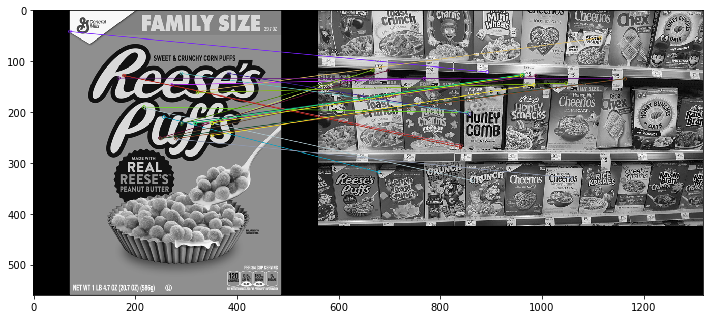

In [125]:
display(reeses_matches)

# Feature Matching - Part Two

In [126]:
sift = cv2.xfeatures2d.SIFT_create()

In [127]:
kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals,None)

In [128]:
bf = cv2.BFMatcher()

In [129]:
matches = bf.knnMatch(des1,des2,k=2)

In [131]:
len(matches) #these many matchs found

1500

In [132]:
good_match = []
for match1,match2 in matches:
    
    if(match1.distance < 0.75*match2.distance):
        good_match.append([match1])

In [135]:
len(good_match) #out of 1500 matches we have selected 78 matches that have more then 75% match

78

In [136]:
sift_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good_match,None,flags=2)

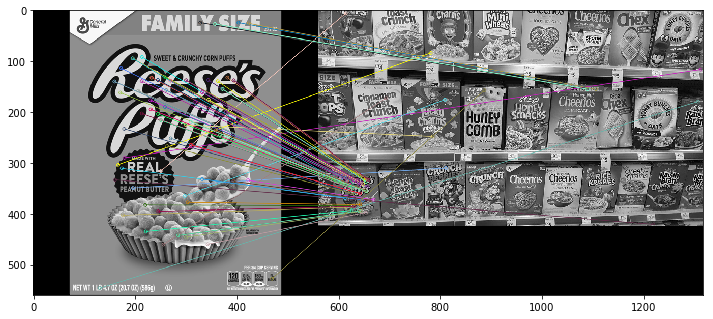

In [137]:
display(sift_matches)

In [141]:
#FLANN based match

sift = cv2.xfeatures2d.SIFT_create()

kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals,None)

# DEFAULT PARAMETERS ASSINGING
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE)
search_params = dict(checks=50)

#FLANN 
flann = cv2.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(des1,des2,k=2)

In [142]:
matchesMask = [[0,0] for i in range(len(matches))]

In [143]:
for i,(match1,match2) in enumerate(matches):
    if match1.distance < 0.7*match2.distance:
        matchesMask[i] = [1,0]

In [144]:
draw_params = dict(matchColor=(0,255,0),
                  singlePointColor=(255,0,0),
                  matchesMask=matchesMask,
                  flags=0)

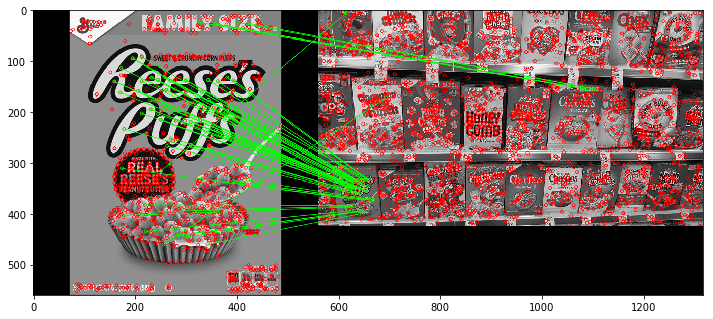

In [146]:
flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,matches,None,**draw_params)
display(flann_matches)

# Watershed Algorithm - Part One

In this lecture we will try segment this coin image by using the algorithm and technique we already know, in the next lecture we use watershed algorithm.

In [147]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [148]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

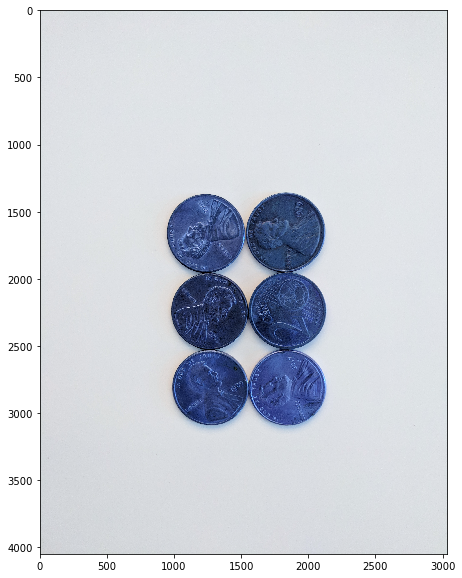

In [150]:
sep_coins = cv2.imread('course_content/DATA/pennies.jpg')
display(sep_coins)

In [152]:
# STEPS 

#median Blur
# convert to gray scale
#binary threshold
#find contours

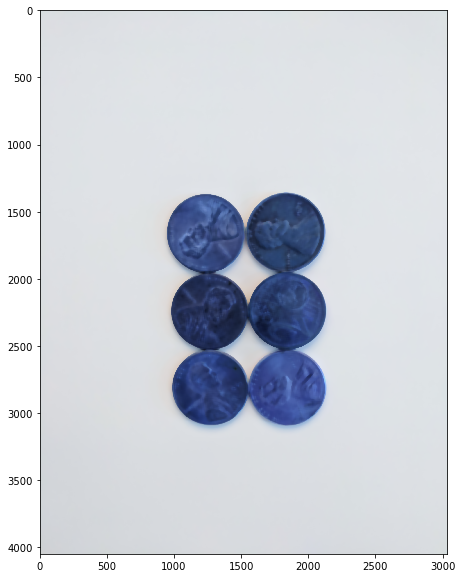

In [153]:
sep_blur = cv2.medianBlur(sep_coins,25)
display(sep_blur)

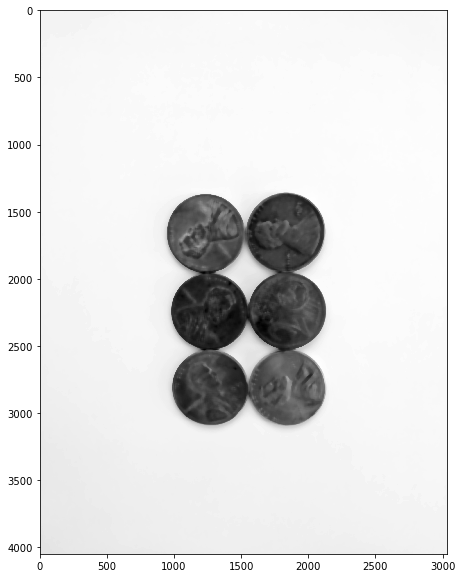

In [154]:
gray_sep_coins = cv2.cvtColor(sep_blur,cv2.COLOR_BGR2GRAY)
display(gray_sep_coins)

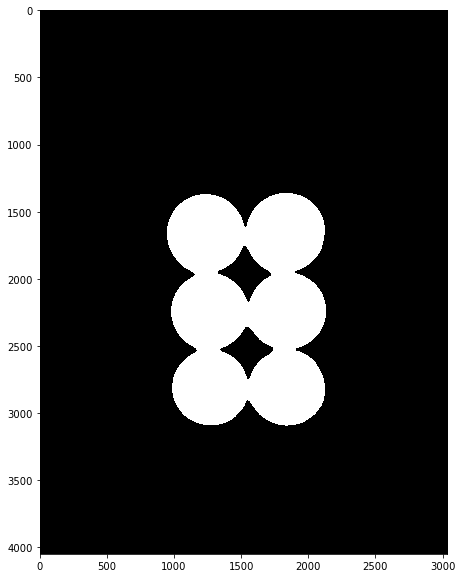

In [162]:
ret,sep_thres = cv2.threshold(gray_sep_coins,160,255,cv2.THRESH_BINARY_INV)
display(sep_thres)

In [165]:
image,contours,hierarchy = cv2.findContours(sep_thres.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

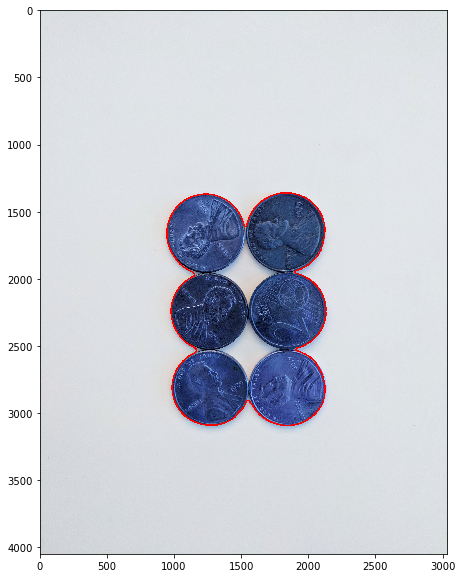

In [166]:
for i in range(len(contours)):
    
    if hierarchy[0][i][3]==-1:
        cv2.drawContours(sep_coins, contours,i,(255,0,0),10)

display(sep_coins)

# Watershed Algorithm - Part Two

In [167]:
img = cv2.imread('course_content/DATA/pennies.jpg')

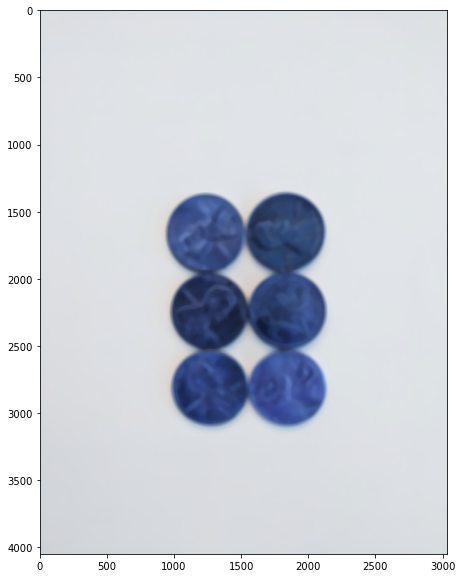

In [171]:
img = cv2.medianBlur(img,35)
display(img)

In [172]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [177]:
ret,thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)


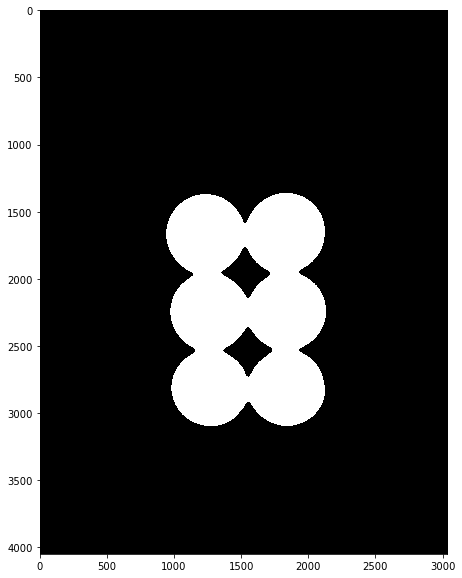

In [178]:
display(thresh)

In [179]:
#  NOISE REMOVAL (OPTIONAL)

kernel = np.ones((3,3),np.uint8)
kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

In [180]:
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations=2)

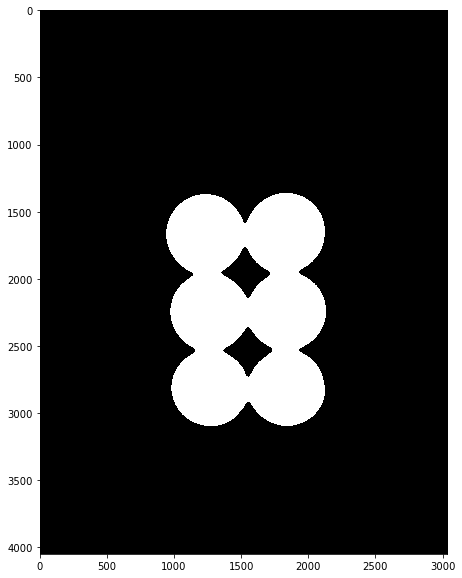

In [181]:
display(opening)

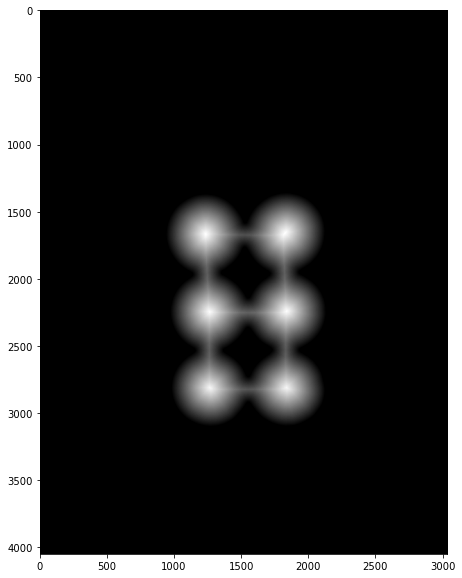

In [182]:
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
display(dist_transform)

In [183]:
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

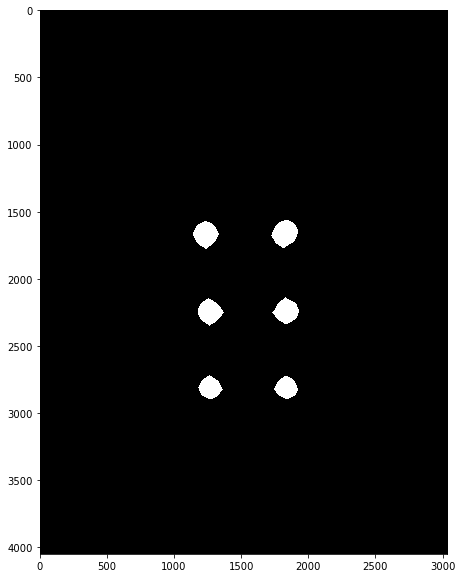

In [184]:
display(sure_fg)

In [185]:
sure_fg = np.uint8(sure_fg)

In [186]:
unknown = cv2.subtract(sure_bg,sure_fg)

NameError: name 'sure_bg' is not defined